In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import gower

from IPython.display import display
%matplotlib inline

In [2]:
df = pd.read_feather('/Users/rafaelalvesferreira/Docs_locais/Projetos/vigitel_predictions/data/interim/cleaned_data.ftr')

In [3]:
pd.options.display.max_columns = None
display(df)

,cidade,idade_anos,sexo,escolaridade_grau,anos_estudo,peso_kg,altura_cm,possui_cnh,dirige,dias_por_sem_feijao,dias_por_sem_hortalica,dias_por_sem_hortalica_crua,dias_por_sem_hortalica_cozida,copos_suco_natural_por_dia,dias_por_sem_frutas,dias_por_sem_refrigerante,ontem_alface_couve_brocolis_agriao_espinafre,ontem_abobora_cenoura_batata-doce_quiabo,ontem_mamao_manga_melao_amarelo_pequi,ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba,ontem_laranja_banana_maca_abacaxi,ontem_arroz_macarrao_polenta_cuscuz_milho_verde,ontem_feijao_ervilh_lentilha_graodebico,ontem_batata_comum_mandioca_cara_inhame,ontem_carneboi_porco_frango_peixe,ontem_ovo_frito_cozido_mexido,ontem_leite,ontem_amendoim_castanhacaju_castanhapara,ontem_refrigerante,ontem_suco_caixinha,ontem_refresco_po,ontem_bebida_achocolatada,ontem_iogurte_sabor,ontem_chips_bolacha_salgada,ontem_bolacha_doce_biscoito_recheado_bolinho_pacote,ontem_chocolate_sorvete_gelatina_flan,ontem_salsicha_linguica_mortadela_presunto,ontem_paodeforma_decachorroquente_dehamburguer,ontem_maionese_ketchup_mostarda,ontem_margarina,ontem_macarraoinstantaneo_sopapacote_pratocongelado,bebidaalcoolica,ultimos3meses_exercicio_fisico,ultimos3meses_trabalhou,frequenta_cursoescola,faz_faxina,quantashorasassistetv/dia,computador_tablet_celular_tempolivre,fumante,ex_fumante,contatoc/fumoemcasa,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,pressao_alta,ultima_afericao_pressao_arterial,diabetes_119,ultima_afericao_glicemia,possedeplanodesaude,recebe_bolsa_familia,moradores,adultos,faixaetaria,categorias(idade|sexo)paraimputacaodaescolaridade,faixadeescolaridade,peso(kg)-valoresimputados,altura(cm)-valoresimputados,fumantes,consumode20oumaiscigarrosaodia,fumantespassivosnodomicilio,fumantespassivosnolocaldetrabalho,eletronico,imccomimputacoes,excessodepesocomimputacoes,obesidadecomimputacoes,consumoregulardehortalicas(5xoumais/sem),consumoregulardefrutas(5xoumais/sem),consumoregulardefrutasehortalicas(5xoumais/sem),contagemdehortalicascruas/dia,contagemdehortalicascozidas/dia,contagemdehortalicas/dia,contagemsuco/dia-max.1/dia,contagemfruta/dia-semsuco,contagemfrutatotal/dia,contagemfrutaehortalicatotal/dia,consumorecomendadodefrutasehortalicas,consumoregularderefrigerantes(5xoumais/sem),consumoregulardefeijao(5xoumais/sem),score_sf,consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas,score_upp,consumodecincooumaisgruposdealimentosultraprocessados,tipo_atv._fis._no_tempo_livre_(lazer),frequenciaderealizacaodeatv.fis.notempolivre(lazer),tempo_de_realizacao_de_atv._fis._no_tempo_livre_(lazer),af*freq*time_(continua),atividadefisicasuficientenolazer-somentetempo/semfrequencia(apartirde2012),atividadefisicanodeslocamento,atividadefisicanotrabalhodomestico,atividadefisicanotrabalho,inatividadefisica,duracao_diaria_do_deslocamento_para_trabalho_(min),duracao_diaria_do_deslocamento_para_o_escola_(min),duracao_diaria_do_deslocamento_para_o_trabalho_e_escola_(min),duracao_semanal_do_deslocamento_para_o_trabalho_e_escola_(min),duracao_semanal_da_atividade_fisica_laboral_(min),duracao_semanal_da_atividade_fisica_domestica(min),atividade_fisica_>=_150min/sem_em_3_dominios,atividadefisica<=150min/semem3dominios,habitodeassistirtv-3hrs/dia,tempodetela(naotv)-3hrs/dia,quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,tempodetela(total)-3hrs/dia,conducaodeveiculoaposconsumobebidaalcoolica,avaliacaoruimdacondicaodesaude,hipertensaoarterial,diabetes
0,10,79,1,1.0,3,62.0,170.0,1.0,1.0,4,3,2.0,2.0,5,4,2,1,1,0,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,1,2,2.0,3,3.0,2.0,3,1.0,1.0,4,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,3,3,6,6,1,62,170,0,0,1,0,0,21.453287,0,0,1,1,1,2,2,4,0,2,2,6,1,0,1,5,1,4,0,1,3.5,34.5,120.75,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,2.5,0.0,0,0,0,0,0
1,10,70,1,1.0,3,66.0,162.0,1.0,2.0,4,2,2.0,2.0,1,2,1,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,2,1,1,2.0,1,2.0,2.0,3,3.0,1.0,4,80.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3,3,6,6,1,6

In [7]:
atributos = [
 'idade_anos',
 'sexo',
 'escolaridade_grau',
 'bebidaalcoolica',
 'frequenta_cursoescola',
 'faz_faxina',
 'fumante',
 'ex_fumante',
 'cigarro_eletronico',
 'cor',
 'estado_conjugal_atual',
 'estado_de_saude',
 'possedeplanodesaude',
 'recebe_bolsa_familia',
 'peso(kg)-valoresimputados',
 'altura(cm)-valoresimputados',
 'fumantes',
 'consumode20oumaiscigarrosaodia',
 'fumantespassivosnodomicilio',
 'fumantespassivosnolocaldetrabalho',
 'eletronico',
 'imccomimputacoes',
 'excessodepesocomimputacoes',
 'obesidadecomimputacoes',
 'consumoregulardehortalicas(5xoumais/sem)',
 'consumoregulardefrutas(5xoumais/sem)',
 'contagemdehortalicascruas/dia',
 'contagemdehortalicascozidas/dia',
 'contagemsuco/dia-max.1/dia',
 'contagemfruta/dia-semsuco',
 'consumoregularderefrigerantes(5xoumais/sem)',
 'consumoregulardefeijao(5xoumais/sem)',
 'consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas',
 'consumodecincooumaisgruposdealimentosultraprocessados',
 'frequenciaderealizacaodeatv.fis.notempolivre(lazer)',
 'tempo_de_realizacao_de_atv._fis._no_tempo_livre_(lazer)',
 'atividadefisicanodeslocamento',
 'atividadefisicanotrabalhodomestico',
 'atividadefisicanotrabalho',
 'inatividadefisica',
 'duracao_diaria_do_deslocamento_para_trabalho_(min)',
 'duracao_diaria_do_deslocamento_para_o_escola_(min)',
 'duracao_semanal_da_atividade_fisica_laboral_(min)',
 'duracao_semanal_da_atividade_fisica_domestica(min)',
 'atividade_fisica_>=_150min/sem_em_3_dominios',
 'atividadefisica<=150min/semem3dominios',
 'tempodetela(naotv)-3hrs/dia',
 'quantas_horas_assiste_tv_/_dia',
 'tempo_computador_tablet_celular_tempolivre',
 'avaliacaoruimdacondicaodesaude',
 'hipertensaoarterial',
 'diabetes']



In [8]:
df_att = df[atributos]

In [9]:
df_att

,idade_anos,sexo,escolaridade_grau,bebidaalcoolica,frequenta_cursoescola,faz_faxina,fumante,ex_fumante,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,possedeplanodesaude,recebe_bolsa_familia,peso(kg)-valoresimputados,altura(cm)-valoresimputados,fumantes,consumode20oumaiscigarrosaodia,fumantespassivosnodomicilio,fumantespassivosnolocaldetrabalho,eletronico,imccomimputacoes,excessodepesocomimputacoes,obesidadecomimputacoes,consumoregulardehortalicas(5xoumais/sem),consumoregulardefrutas(5xoumais/sem),contagemdehortalicascruas/dia,contagemdehortalicascozidas/dia,contagemsuco/dia-max.1/dia,contagemfruta/dia-semsuco,consumoregularderefrigerantes(5xoumais/sem),consumoregulardefeijao(5xoumais/sem),consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas,consumodecincooumaisgruposdealimentosultraprocessados,frequenciaderealizacaodeatv.fis.notempolivre(lazer),tempo_de_realizacao_de_atv._fis._no_tempo_livre_(lazer),atividadefisicanodeslocamento,atividadefisicanotrabalhodomestico,atividadefisicanotrabalho,inatividadefisica,duracao_diaria_do_deslocamento_para_trabalho_(min),duracao_diaria_do_deslocamento_para_o_escola_(min),duracao_semanal_da_atividade_fisica_laboral_(min),duracao_semanal_da_atividade_fisica_domestica(min),atividade_fisica_>=_150min/sem_em_3_dominios,atividadefisica<=150min/semem3dominios,tempodetela(naotv)-3hrs/dia,quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,avaliacaoruimdacondicaodesaude,hipertensaoarterial,diabetes
0,79,1,1.0,2,2.0,3,3,1.0,4,1.0,2.0,2.0,3.0,2.0,62,170,0,0,1,0,0,21.453287,0,0,1,1,2,2,0,2,0,1,1,0,3.5,34.5,0,0,0,0,0.0,0.0,0,0,0,1,0,2.5,0.0,0,0,0
1,70,1,1.0,2,2.0,1,3,3.0,4,80.0,2.0,1.0,3.0,2.0,66,162,0,0,1,0,0,25.148605,1,0,0,0,1,1,1,2,0,1,1,0,3.5,34.5,1,1,1,0,44.5,0.0,0,50,1,0,0,1.5,0.0,0,0,0
2,70,1,4.0,2,2.0,3,3,2.0,4,4.0,2.0,3.0,1.0,2.0,85,182,0,0,0,0,0,25.661152,1,0,1,0,2,2,0,3,0,1,0,0,3.5,60.0,0,0,0,0,0.0,0.0,0,0,1,0,0,1.0,0.0,0,1,1
3,73,1,1.0,2,2.0,3,3,3.0,4,80.0,2.0,3.0,1.0,2.0,178,166,0,0,0,0,0,64.595734,1,1,0,0,0,0,0,1,0,1,0,0,1.5,44.5,0,0,0,0,0.0,0.0,0,0,0,1,0,4.5,0.0,0,1,0
4,63,1,1.0,1,2.0,2,3,3.0,4,5.0,3.0,4.0,1.0,2.0,82,168,0,0,0,0,0,29.053288,1,0,0,1,1,1,1,1,0,1,0,0,5.5,60.0,0,0,0,0,0.0,0.0,0,210,1,0,0,1.0,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34868,70,2,6.0,2,2.0,3,3,1.0,4,4.0,1.0,3.0,1.0,2.0,84,164,0,0,0,0,0,31.231409,1,1,0,1,1,2,1,1,0,0,0,0,1.5,54.5,0,0,0,0,0.0,0.0,0,0,0,1,0,1.5,1.5,0,1,0
34869,76,2,6.0,2,2.0,1,3,3.0,4,1.0,2.0,2.0,1.0,2.0,80,163,0,0,0,0,0,30.110279,1,1,1,1,1,1,1,2,0,1,1,0,0.0,0.0,0,1,0,0,0.0,0.0,0,180,0,1,0,1.5,1.5,0,1,0
34870,70,2,6.0,2,2.0,1,3,1.0,4,1.0,2.0,2.0,1.0,2.0,63,168,0,0,0,0,0,22.321428,0,0,1,1,1,1,1,1,0,0,0,0,0.0,0.0,0,1,0,0,0.0,0.0,0,180,0,1,0,1.5,1.0,0,0,0
34871,66,2,6.0,1,2.0,3,3,3.0,4,1.0,2.0,2.0,1.0,2.0,65,154,0,0,0,0,0,27.407658,1,0,0,1,1,1,0,2,0,0,0,0,1.5,60.0,0,0,0,0,0.0,0.0,0,0,0,1,1,6.0,6.0,0,0,0


In [11]:
df_att = df_att[df_att['cor'] != 80]

In [16]:
numericos = ['idade_anos',
 'peso(kg)-valoresimputados',
 'altura(cm)-valoresimputados',
 'imccomimputacoes',
 'frequenciaderealizacaodeatv.fis.notempolivre(lazer)',
 'tempo_de_realizacao_de_atv._fis._no_tempo_livre_(lazer)',
 'duracao_diaria_do_deslocamento_para_trabalho_(min)',
 'duracao_diaria_do_deslocamento_para_o_escola_(min)',
 'duracao_semanal_da_atividade_fisica_laboral_(min)',
 'duracao_semanal_da_atividade_fisica_domestica(min)',
 'quantas_horas_assiste_tv_/_dia',
 'tempo_computador_tablet_celular_tempolivre']

In [17]:
scaler = StandardScaler()
df_att[numericos] = scaler.fit_transform(df_att[numericos])

In [18]:
df_att

,idade_anos,sexo,escolaridade_grau,bebidaalcoolica,frequenta_cursoescola,faz_faxina,fumante,ex_fumante,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,possedeplanodesaude,recebe_bolsa_familia,peso(kg)-valoresimputados,altura(cm)-valoresimputados,fumantes,consumode20oumaiscigarrosaodia,fumantespassivosnodomicilio,fumantespassivosnolocaldetrabalho,eletronico,imccomimputacoes,excessodepesocomimputacoes,obesidadecomimputacoes,consumoregulardehortalicas(5xoumais/sem),consumoregulardefrutas(5xoumais/sem),contagemdehortalicascruas/dia,contagemdehortalicascozidas/dia,contagemsuco/dia-max.1/dia,contagemfruta/dia-semsuco,consumoregularderefrigerantes(5xoumais/sem),consumoregulardefeijao(5xoumais/sem),consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas,consumodecincooumaisgruposdealimentosultraprocessados,frequenciaderealizacaodeatv.fis.notempolivre(lazer),tempo_de_realizacao_de_atv._fis._no_tempo_livre_(lazer),atividadefisicanodeslocamento,atividadefisicanotrabalhodomestico,atividadefisicanotrabalho,inatividadefisica,duracao_diaria_do_deslocamento_para_trabalho_(min),duracao_diaria_do_deslocamento_para_o_escola_(min),duracao_semanal_da_atividade_fisica_laboral_(min),duracao_semanal_da_atividade_fisica_domestica(min),atividade_fisica_>=_150min/sem_em_3_dominios,atividadefisica<=150min/semem3dominios,tempodetela(naotv)-3hrs/dia,quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,avaliacaoruimdacondicaodesaude,hipertensaoarterial,diabetes
0,1.572432,1,1.0,2,2.0,3,3,1.0,4,1.0,2.0,2.0,3.0,2.0,-0.651854,0.561113,0,0,1,0,0,-1.042557,0,0,1,1,2,2,0,2,0,1,1,0,0.589682,0.125238,0,0,0,0,-0.328097,-0.218862,-0.020900,-0.038703,0,1,0,0.253760,-0.995982,0,0,0
2,1.058644,1,4.0,2,2.0,3,3,2.0,4,4.0,2.0,3.0,1.0,2.0,0.857997,1.756134,0,0,0,0,0,-0.187855,1,0,1,0,2,2,0,3,0,1,0,0,0.589682,1.043634,0,0,0,0,-0.328097,-0.218862,-0.020900,-0.038703,1,0,0,-0.807585,-0.995982,0,1,1
4,0.659031,1,1.0,1,2.0,2,3,3.0,4,5.0,3.0,4.0,1.0,2.0,0.661060,0.361942,0,0,0,0,0,0.501155,1,0,0,1,1,1,1,1,0,1,0,0,1.473536,1.043634,0,0,0,0,-0.328097,-0.218862,-0.020900,-0.038526,1,0,0,-0.807585,-0.030572,1,0,0
6,1.629519,1,8.0,2,2.0,3,3,2.0,4,4.0,2.0,3.0,1.0,2.0,0.726706,0.461527,0,0,0,0,0,0.502642,1,0,1,0,2,1,0,1,1,1,0,0,-0.957063,-1.117299,0,0,0,1,-0.328097,-0.218862,-0.020900,-0.038703,0,1,0,2.730232,-0.995982,0,1,1
7,0.601943,1,1.0,2,2.0,2,3,3.0,4,2.0,2.0,2.0,3.0,2.0,-0.783145,0.561113,0,0,0,0,0,-1.183124,0,0,1,1,2,2,1,1,0,0,0,0,-0.957063,-1.117299,0,0,0,1,-0.328097,-0.218862,-0.020900,-0.038602,0,1,0,-0.807585,-0.995982,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34868,1.058644,2,6.0,2,2.0,3,3,1.0,4,4.0,1.0,3.0,1.0,2.0,0.792352,-0.036398,0,0,0,0,0,0.943575,1,1,0,1,1,2,1,1,0,0,0,0,-0.294172,0.845549,0,0,0,0,-0.328097,-0.218862,-0.020900,-0.038703,0,1,0,-0.453803,-0.030572,0,1,0
34869,1.401169,2,6.0,2,2.0,1,3,3.0,4,1.0,2.0,2.0,1.0,2.0,0.529769,-0.135983,0,0,0,0,0,0.715851,1,1,1,1,1,1,1,2,0,1,1,0,-0.957063,-1.117299,0,1,0,0,-0.328097,-0.218862,-0.020900,-0.038551,0,1,0,-0.453803,-0.030572,0,1,0
34870,1.058644,2,6.0,2,2.0,1,3,1.0,4,1.0,2.0,2.0,1.0,2.0,-0.586208,0.361942,0,0,0,0,0,-0.866220,0,0,1,1,1,1,1,1,0,0,0,0,-0.957063,-1.117299,0,1,0,0,-0.328097,-0.218862,-0.020900,-0.038551,0,1,0,-0.453803,-0.352375,0,0,0
34871,0.830294,2,6.0,1,2.0,3,3,3.0,4,1.0,2.0,2.0,1.0,2.0,-0.454916,-1.032249,0,0,0,0,0,0.166895,1,0,0,1,1,1,0,2,0,0,0,0,-0.294172,1.043634,0,0,0,0,-0.328097,-0.218862,-0.020900,-0.038703,0,1,1,2.730232,2.865661,0,0,0


In [23]:
df_att.reset_index(inplace=True)
df_att = df_att.drop('index', axis=1)

In [30]:
X_train, X_test = train_test_split(df_att, test_size=0.5, stratify=df_att['sexo']) 

In [31]:
X_test

,idade_anos,sexo,escolaridade_grau,bebidaalcoolica,frequenta_cursoescola,faz_faxina,fumante,ex_fumante,cigarro_eletronico,cor,estado_conjugal_atual,estado_de_saude,possedeplanodesaude,recebe_bolsa_familia,peso(kg)-valoresimputados,altura(cm)-valoresimputados,fumantes,consumode20oumaiscigarrosaodia,fumantespassivosnodomicilio,fumantespassivosnolocaldetrabalho,eletronico,imccomimputacoes,excessodepesocomimputacoes,obesidadecomimputacoes,consumoregulardehortalicas(5xoumais/sem),consumoregulardefrutas(5xoumais/sem),contagemdehortalicascruas/dia,contagemdehortalicascozidas/dia,contagemsuco/dia-max.1/dia,contagemfruta/dia-semsuco,consumoregularderefrigerantes(5xoumais/sem),consumoregulardefeijao(5xoumais/sem),consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas,consumodecincooumaisgruposdealimentosultraprocessados,frequenciaderealizacaodeatv.fis.notempolivre(lazer),tempo_de_realizacao_de_atv._fis._no_tempo_livre_(lazer),atividadefisicanodeslocamento,atividadefisicanotrabalhodomestico,atividadefisicanotrabalho,inatividadefisica,duracao_diaria_do_deslocamento_para_trabalho_(min),duracao_diaria_do_deslocamento_para_o_escola_(min),duracao_semanal_da_atividade_fisica_laboral_(min),duracao_semanal_da_atividade_fisica_domestica(min),atividade_fisica_>=_150min/sem_em_3_dominios,atividadefisica<=150min/semem3dominios,tempodetela(naotv)-3hrs/dia,quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,avaliacaoruimdacondicaodesaude,hipertensaoarterial,diabetes
19512,0.887381,2,1.0,2,2.0,1,3,3.0,4,4.0,1.0,4.0,1.0,2.0,-0.520562,-0.733494,0,0,0,0,0,-0.126231,1,0,1,1,0,1,0,3,0,0,0,0,0.589682,1.043634,0,1,0,0,-0.328097,-0.218862,-0.0209,0.045492,1,0,0,0.253760,-0.995982,1,0,0
20100,-1.167771,2,5.0,2,1.0,2,3,3.0,4,4.0,2.0,2.0,1.0,1.0,0.923643,-0.235568,0,0,0,0,0,1.255971,1,1,1,1,2,2,1,3,0,1,1,0,0.589682,1.043634,0,1,0,0,-0.328097,-0.218862,-0.0209,-0.038197,1,0,1,-0.453803,1.256643,0,0,0
12168,-0.596895,2,5.0,2,2.0,2,3,3.0,4,4.0,1.0,2.0,1.0,2.0,-0.192334,-1.032249,0,0,0,0,0,0.509482,1,0,1,0,1,2,1,1,0,0,0,0,-0.957063,-1.117299,0,0,0,1,-0.328097,-0.218862,-0.0209,-0.038703,0,1,0,0.253760,-0.030572,0,0,0
28465,-0.711070,2,6.0,2,1.0,1,3,3.0,4,4.0,3.0,3.0,3.0,2.0,0.135895,-0.733494,0,0,0,0,0,0.697819,1,1,0,1,0,1,1,3,0,0,0,0,-0.957063,-1.117299,0,1,1,0,-0.328097,-0.218862,-0.0209,-0.038501,0,1,0,-1.515148,-0.030572,0,0,0
1205,0.830294,1,6.0,1,1.0,3,3,1.0,4,1.0,2.0,2.0,1.0,2.0,0.989289,0.859868,0,0,0,0,0,0.504305,1,0,1,1,1,1,0,2,0,1,0,0,1.473536,0.485393,0,0,0,0,-0.328097,-0.218862,-0.0209,-0.038703,1,0,0,2.730232,-0.352375,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31230,1.229907,2,3.0,1,2.0,2,3,1.0,4,4.0,2.0,2.0,1.0,2.0,-0.651854,0.063187,0,0,0,0,0,-0.774459,0,0,1,0,1,1,1,2,0,1,1,0,-0.294172,0.125238,0,0,0,0,-0.328097,-0.218862,-0.0209,-0.038602,0,1,0,-0.807585,-0.995982,0,0,0
28396,1.972045,2,5.0,1,2.0,3,3,1.0,3,1.0,2.0,4.0,1.0,2.0,-1.177019,-0.534324,0,0,0,0,0,-1.061523,0,0,1,1,1,0,0,2,0,1,1,0,-0.957063,-1.117299,0,0,0,1,-0.328097,-0.218862,-0.0209,-0.038703,0,1,0,1.668887,-0.030572,1,0,0
12147,-1.909909,2,5.0,1,2.0,3,3,3.0,4,1.0,1.0,1.0,1.0,2.0,-1.505248,-0.335153,0,0,0,0,0,-1.560451,0,0,0,1,1,1,1,1,0,1,0,0,-0.294172,1.043634,0,0,0,0,-0.328097,-0.218862,-0.0209,-0.038703,0,1,0,-0.807585,-0.030572,0,0,0
13543,0.316506,2,5.0,1,2.0,1,3,3.0,4,1.0,2.0,2.0,1.0,2.0,-0.651854,-0.932664,0,0,0,0,0,-0.158342,1,0,1,1,1,1,0,2,0,0,1,0,-0.294172,1.043634,0,1,0,0,-0.328097,-0.218862,-0.0209,-0.038349,1,0,0,1.668887,-0.030572,0,1,0


In [32]:
gower_df = gower.gower_matrix(X_test)

In [37]:
list(df.columns)

['cidade',
 'idade_anos',
 'sexo',
 'escolaridade_grau',
 'anos_estudo',
 'peso_kg',
 'altura_cm',
 'possui_cnh',
 'dirige',
 'dias_por_sem_feijao',
 'dias_por_sem_hortalica',
 'dias_por_sem_hortalica_crua',
 'dias_por_sem_hortalica_cozida',
 'copos_suco_natural_por_dia',
 'dias_por_sem_frutas',
 'dias_por_sem_refrigerante',
 'ontem_alface_couve_brocolis_agriao_espinafre',
 'ontem_abobora_cenoura_batata-doce_quiabo',
 'ontem_mamao_manga_melao_amarelo_pequi',
 'ontem_tomate_pepino_abobrinha_berinjela_chuchu_beterraba',
 'ontem_laranja_banana_maca_abacaxi',
 'ontem_arroz_macarrao_polenta_cuscuz_milho_verde',
 'ontem_feijao_ervilh_lentilha_graodebico',
 'ontem_batata_comum_mandioca_cara_inhame',
 'ontem_carneboi_porco_frango_peixe',
 'ontem_ovo_frito_cozido_mexido',
 'ontem_leite',
 'ontem_amendoim_castanhacaju_castanhapara',
 'ontem_refrigerante',
 'ontem_suco_caixinha',
 'ontem_refresco_po',
 'ontem_bebida_achocolatada',
 'ontem_iogurte_sabor',
 'ontem_chips_bolacha_salgada',
 'ontem_bo

In [87]:
new_list = [
 'idade_anos',
 'sexo',
 'bebidaalcoolica',
 'fumante',
 'ex_fumante',
 'contatoc/fumoemcasa',
 'estado_de_saude',
 'imccomimputacoes',
 'consumoregulardefrutasehortalicas(5xoumais/sem)',
 'consumorecomendadodefrutasehortalicas',
 'consumoregularderefrigerantes(5xoumais/sem)',
 'consumoregulardefeijao(5xoumais/sem)',
 'consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas',
 'consumodecincooumaisgruposdealimentosultraprocessados',
 'frequenciaderealizacaodeatv.fis.notempolivre(lazer)',
 'atividadefisicanodeslocamento',
 'atividadefisicanotrabalhodomestico',
 'atividadefisicanotrabalho',
 'inatividadefisica',
 'atividade_fisica_>=_150min/sem_em_3_dominios',
 'atividadefisica<=150min/semem3dominios',
 'quantas_horas_assiste_tv_/_dia',
 'tempo_computador_tablet_celular_tempolivre',
 'tempodetela(total)-3hrs/dia',
 'hipertensaoarterial',
 'diabetes']

In [88]:
new_df = df[new_list]

In [89]:
new_df

,idade_anos,sexo,bebidaalcoolica,fumante,ex_fumante,contatoc/fumoemcasa,estado_de_saude,imccomimputacoes,consumoregulardefrutasehortalicas(5xoumais/sem),consumorecomendadodefrutasehortalicas,consumoregularderefrigerantes(5xoumais/sem),consumoregulardefeijao(5xoumais/sem),consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas,consumodecincooumaisgruposdealimentosultraprocessados,frequenciaderealizacaodeatv.fis.notempolivre(lazer),atividadefisicanodeslocamento,atividadefisicanotrabalhodomestico,atividadefisicanotrabalho,inatividadefisica,atividade_fisica_>=_150min/sem_em_3_dominios,atividadefisica<=150min/semem3dominios,quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,tempodetela(total)-3hrs/dia,hipertensaoarterial,diabetes
0,79,1,2,3,1.0,1.0,2.0,21.453287,1,1,0,1,1,0,3.5,0,0,0,0,0,1,2.5,0.0,0,0,0
1,70,1,2,3,3.0,1.0,1.0,25.148605,0,0,0,1,1,0,3.5,1,1,1,0,1,0,1.5,0.0,0,0,0
2,70,1,2,3,2.0,2.0,3.0,25.661152,0,0,0,1,0,0,3.5,0,0,0,0,1,0,1.0,0.0,0,1,1
3,73,1,2,3,3.0,2.0,3.0,64.595734,0,0,0,1,0,0,1.5,0,0,0,0,0,1,4.5,0.0,1,1,0
4,63,1,1,3,3.0,2.0,4.0,29.053288,0,0,0,1,0,0,5.5,0,0,0,0,1,0,1.0,1.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34868,70,2,2,3,1.0,2.0,3.0,31.231409,0,0,0,0,0,0,1.5,0,0,0,0,0,1,1.5,1.5,1,1,0
34869,76,2,2,3,3.0,2.0,2.0,30.110279,1,1,0,1,1,0,0.0,0,1,0,0,0,1,1.5,1.5,1,1,0
34870,70,2,2,3,1.0,2.0,2.0,22.321428,1,0,0,0,0,0,0.0,0,1,0,0,0,1,1.5,1.0,0,0,0
34871,66,2,1,3,3.0,2.0,2.0,27.407658,0,0,0,0,0,0,1.5,0,0,0,0,0,1,6.0,6.0,1,0,0


In [90]:
new_cat = [
 'sexo',
 'bebidaalcoolica',
 'fumante',
 'ex_fumante',
 'contatoc/fumoemcasa',
 'estado_de_saude',
 'consumoregulardefrutasehortalicas(5xoumais/sem)',
 'consumorecomendadodefrutasehortalicas',
 'consumoregularderefrigerantes(5xoumais/sem)',
 'consumoregulardefeijao(5xoumais/sem)',
 'consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas',
 'consumodecincooumaisgruposdealimentosultraprocessados',
 'atividadefisicanodeslocamento',
 'atividadefisicanotrabalhodomestico',
 'atividadefisicanotrabalho',
 'inatividadefisica',
 'atividade_fisica_>=_150min/sem_em_3_dominios',
 'atividadefisica<=150min/semem3dominios',
 'tempodetela(total)-3hrs/dia',
 'hipertensaoarterial',
 'diabetes']

In [91]:
for column_name in new_cat:
    new_df[column_name] = new_df[column_name].astype('int64')
    new_df[column_name] = new_df[column_name].astype('category')

In [92]:
new_num = ['idade_anos', 'imccomimputacoes',
'frequenciaderealizacaodeatv.fis.notempolivre(lazer)',
'quantas_horas_assiste_tv_/_dia',
'tempo_computador_tablet_celular_tempolivre']

In [93]:
new_df_dummies = pd.get_dummies(new_df)

In [103]:
new_df

,idade_anos,sexo,bebidaalcoolica,fumante,ex_fumante,contatoc/fumoemcasa,estado_de_saude,imccomimputacoes,consumoregulardefrutasehortalicas(5xoumais/sem),consumorecomendadodefrutasehortalicas,consumoregularderefrigerantes(5xoumais/sem),consumoregulardefeijao(5xoumais/sem),consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas,consumodecincooumaisgruposdealimentosultraprocessados,frequenciaderealizacaodeatv.fis.notempolivre(lazer),atividadefisicanodeslocamento,atividadefisicanotrabalhodomestico,atividadefisicanotrabalho,inatividadefisica,atividade_fisica_>=_150min/sem_em_3_dominios,atividadefisica<=150min/semem3dominios,quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,tempodetela(total)-3hrs/dia,hipertensaoarterial,diabetes
0,79,1,2,3,1,1,2,21.453287,1,1,0,1,1,0,3.5,0,0,0,0,0,1,2.5,0.0,0,0,0
1,70,1,2,3,3,1,1,25.148605,0,0,0,1,1,0,3.5,1,1,1,0,1,0,1.5,0.0,0,0,0
2,70,1,2,3,2,2,3,25.661152,0,0,0,1,0,0,3.5,0,0,0,0,1,0,1.0,0.0,0,1,1
3,73,1,2,3,3,2,3,64.595734,0,0,0,1,0,0,1.5,0,0,0,0,0,1,4.5,0.0,1,1,0
4,63,1,1,3,3,2,4,29.053288,0,0,0,1,0,0,5.5,0,0,0,0,1,0,1.0,1.5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34868,70,2,2,3,1,2,3,31.231409,0,0,0,0,0,0,1.5,0,0,0,0,0,1,1.5,1.5,1,1,0
34869,76,2,2,3,3,2,2,30.110279,1,1,0,1,1,0,0.0,0,1,0,0,0,1,1.5,1.5,1,1,0
34870,70,2,2,3,1,2,2,22.321428,1,0,0,0,0,0,0.0,0,1,0,0,0,1,1.5,1.0,0,0,0
34871,66,2,1,3,3,2,2,27.407658,0,0,0,0,0,0,1.5,0,0,0,0,0,1,6.0,6.0,1,0,0


In [97]:
new_df_dummies

,idade_anos,imccomimputacoes,frequenciaderealizacaodeatv.fis.notempolivre(lazer),quantas_horas_assiste_tv_/_dia,tempo_computador_tablet_celular_tempolivre,sexo_1,sexo_2,bebidaalcoolica_1,bebidaalcoolica_2,fumante_3,ex_fumante_1,ex_fumante_2,ex_fumante_3,contatoc/fumoemcasa_1,contatoc/fumoemcasa_2,estado_de_saude_1,estado_de_saude_2,estado_de_saude_3,estado_de_saude_4,estado_de_saude_5,consumoregulardefrutasehortalicas(5xoumais/sem)_0,consumoregulardefrutasehortalicas(5xoumais/sem)_1,consumorecomendadodefrutasehortalicas_0,consumorecomendadodefrutasehortalicas_1,consumoregularderefrigerantes(5xoumais/sem)_0,consumoregularderefrigerantes(5xoumais/sem)_1,consumoregulardefeijao(5xoumais/sem)_0,consumoregulardefeijao(5xoumais/sem)_1,consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas_0,consumodecincooumaisgruposdealimentosnaoouminimamenteprocessadosprotetoresparadoencascronicas_1,consumodecincooumaisgruposdealimentosultraprocessados_0,consumodecincooumaisgruposdealimentosultraprocessados_1,atividadefisicanodeslocamento_0,atividadefisicanodeslocamento_1,atividadefisicanotrabalhodomestico_0,atividadefisicanotrabalhodomestico_1,atividadefisicanotrabalho_0,atividadefisicanotrabalho_1,inatividadefisica_0,inatividadefisica_1,atividade_fisica_>=_150min/sem_em_3_dominios_0,atividade_fisica_>=_150min/sem_em_3_dominios_1,atividadefisica<=150min/semem3dominios_0,atividadefisica<=150min/semem3dominios_1,tempodetela(total)-3hrs/dia_0,tempodetela(total)-3hrs/dia_1,hipertensaoarterial_0,hipertensaoarterial_1,diabetes_0,diabetes_1
0,1.537839,-1.041488,0.597383,0.245935,-0.970078,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0
1,1.024752,-0.293599,0.597383,-0.456768,-0.970078,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0
2,1.024752,-0.189866,0.597383,-0.808119,-0.970078,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1
3,1.195781,7.690030,-0.286063,1.651341,-0.970078,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
4,0.625683,0.496662,1.480828,-0.808119,-0.000676,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34868,1.024752,0.937488,-0.286063,-0.456768,-0.000676,0,1,0,1,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0
34869,1.366810,0.710584,-0.948647,-0.456768,-0.000676,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
34870,1.024752,-0.865786,-0.948647,-0.456768,-0.323810,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0
34871,0.796713,0.163606,-0.286063,2.705395,2.907529,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0


In [95]:
scaler = StandardScaler()
new_df_dummies[new_num] = scaler.fit_transform(new_df_dummies[new_num])


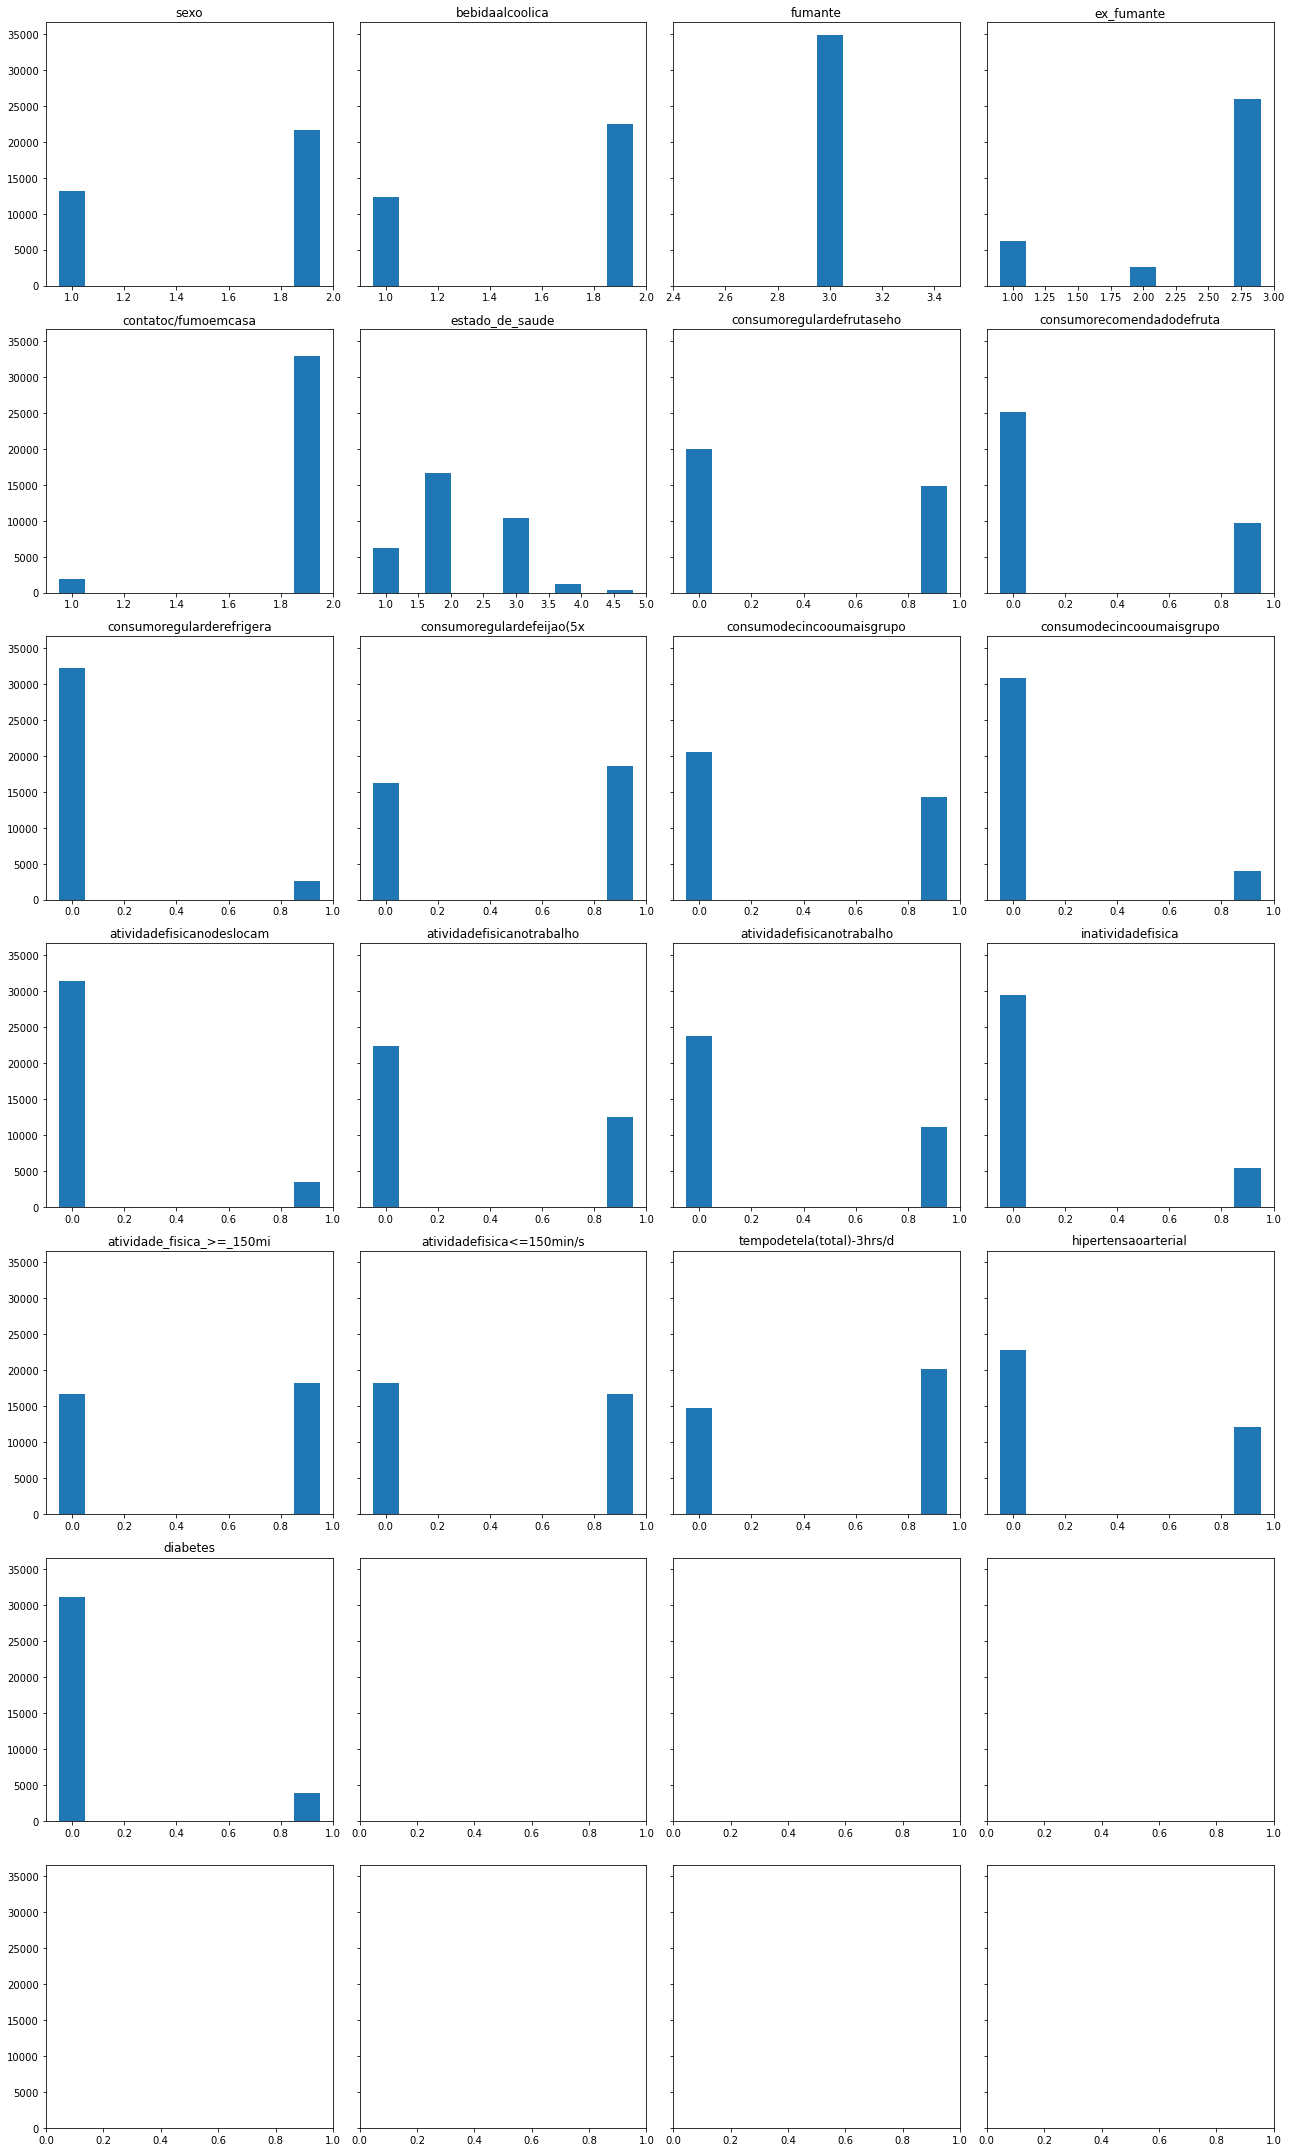

In [96]:
fig, axs = plt.subplots(7, 4, figsize=(18, 30), sharey=True)

for ax, feat in zip(axs.flatten(), new_cat):
    ax.hist(new_df[feat], align='left')
    ax.set_title(feat[:25])
plt.tight_layout()

In [98]:
def cluster_selection(X):
    #testando k-means para vários ks
    for k in range(2,11):
        kmeans_model = KMeans(n_clusters=k)
        # Fit model to samples
        kmeans_model.fit(X)
        kmeans_labels = kmeans_model.predict(X)
        silhouette_avg = silhouette_score(X, kmeans_labels)
        print(f'KMeans - {k} clusters: Silhouette Score: {silhouette_avg}')
    print('- - - - - - - - -')

    #testando clusters hierarquicos
    agg_model = AgglomerativeClustering()
    agg_labels = agg_model.fit_predict(X)
    silhouette_avg = silhouette_score(X, agg_labels)
    print(f'Cluster Hierarquico: Silhouette Score: {silhouette_avg}')
    print('- - - - - - - - -')

    #testando GaussianMixture
    for k in range(2, 11):
        gmix_model = GaussianMixture(n_components=k)
        gmix_labels = gmix_model.fit_predict(X)
        silhouette_avg = silhouette_score(X, gmix_labels)
        print(f'GMix - {k} clusters: Silhouette Score: {silhouette_avg}')

        #testando affinity
    agg_model = AffinityPropagation()
    agg_labels = agg_model.fit_predict(X)
    silhouette_avg = silhouette_score(X, agg_labels)
    print(f'Affinity: Silhouette Score: {silhouette_avg}')
    print('- - - - - - - - -')

    #testando optics
    agg_model = OPTICS(metric='cityblock')
    agg_labels = agg_model.fit_predict(X)
    silhouette_avg = silhouette_score(X, agg_labels)
    print(f'Optics: Silhouette Score: {silhouette_avg}')
    print('- - - - - - - - -')

In [99]:
cluster_selection(new_df_dummies)

KMeans - 2 clusters: Silhouette Score: 0.12774421581519493
KMeans - 3 clusters: Silhouette Score: 0.11086432837093818
KMeans - 4 clusters: Silhouette Score: 0.09573089388921721
KMeans - 5 clusters: Silhouette Score: 0.08971527338239466
KMeans - 6 clusters: Silhouette Score: 0.09156419465515617
KMeans - 7 clusters: Silhouette Score: 0.09054918179744299
KMeans - 8 clusters: Silhouette Score: 0.08890806750588391
KMeans - 9 clusters: Silhouette Score: 0.0831386705215939
KMeans - 10 clusters: Silhouette Score: 0.07650373342459209
- - - - - - - - -
Cluster Hierarquico: Silhouette Score: 0.12181441306371585
- - - - - - - - -
GMix - 2 clusters: Silhouette Score: 0.12744746901305037
GMix - 3 clusters: Silhouette Score: 0.09035380313389667
GMix - 4 clusters: Silhouette Score: 0.057941997965002295
GMix - 5 clusters: Silhouette Score: 0.0713822104886818
GMix - 6 clusters: Silhouette Score: 0.034009053707687475
GMix - 7 clusters: Silhouette Score: 0.03720085227340684
GMix - 8 clusters: Silhouette S

NameError: name 'AffinityPropagation' is not defined